In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Excel to Pandas

In [3]:
#Read excel file with multiple sheets
#Must close the excel programme else permissino denied
Labo1_xls = pd.read_excel("Labo1_detergent.xlsx", sheet_name=['big_velocity','small_velocity','density'])

# Access individual sheets using sheet names
big_velo_df = Labo1_xls['big_velocity']
small_velo_df = Labo1_xls['small_velocity']
density_df = Labo1_xls['density']

In [3]:
# print(big_velo_df)
# print(small_velo_df)

# big_velo_df.head()
my_density_df.head()

,volume,mass
0,24.50,84.376
1,21.00,81.714
2,19.00,79.714
3,15.25,75.843
4,13.50,74.190


## Pandas to Numpy: big_velo

In [4]:
#create numpy array to receive panda
#(number of columns, number of rows)
array_shape = (len(big_velo_df.columns), big_velo_df.index.stop)
big_velo_data = np.zeros(array_shape)

#pair column name with column number
col_iterator = zip(big_velo_df.columns, range(0, len(big_velo_df.columns), 1))

#retrieve column from pandas using name; assign to numpy using number
for col_name, col_num in col_iterator:
    big_velo_data[col_num] = big_velo_df[col_name].to_numpy()

## Data processing: Big Velo

In [5]:
time = big_velo_data[0][~np.isnan(big_velo_data[0])]
distance = big_velo_data[1][~np.isnan(big_velo_data[1])]

ish_time = big_velo_data[2]
ish_distance = big_velo_data[3]

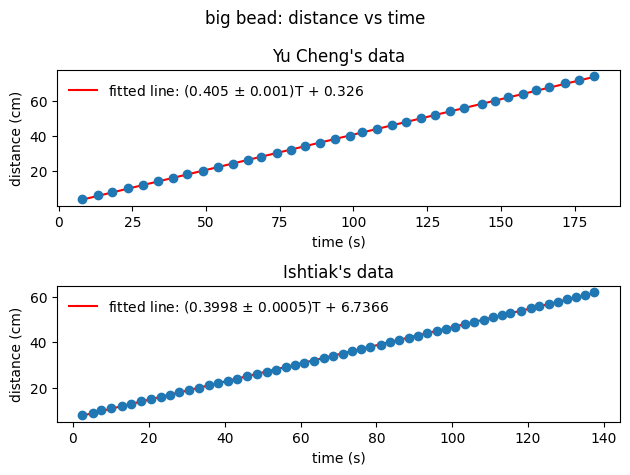

In [8]:
fig, (ax1, ax_ish) = plt.subplots(2,1)
fig.suptitle('big bead: distance vs time')


ax1.set_title("Yu Cheng's data")
ax1.errorbar(time, distance, fmt='o')

line = stats.linregress(time, distance)

ax1.plot(time, line.intercept + line.slope*time, 'r', label=r'fitted line: ({:1.3f} $\pm$ {:1.3f})T + {:1.3f}'.format(float(line.slope), float(line.stderr), float(line.intercept)))
ax1.legend(loc='upper left', frameon=False)
ax1.set_xlabel('time (s)')
ax1.set_ylabel('distance (cm)')


ax_ish.set_title("Ishtiak's data")
ax_ish.errorbar(ish_time, ish_distance, fmt='o')

line = stats.linregress(ish_time, ish_distance)

ax_ish.plot(ish_time, line.intercept + line.slope*ish_time, 'r', label=r'fitted line: ({:1.4f} $\pm$ {:1.4f})T + {:1.4f}'.format(float(line.slope), float(line.stderr), float(line.intercept)))
ax_ish.legend(loc='upper left', frameon=False)
ax_ish.set_xlabel('time (s)')
ax_ish.set_ylabel('distance (cm)')


fig.tight_layout()

## Pandas to Numpy: small_velocity

In [48]:
#create numpy array to receive panda
#(number of columns, number of rows)
array_shape = (len(small_velo_df.columns), small_velo_df.index.stop)
small_velo_data = np.zeros(array_shape)

#pair column name with column number
col_iterator = zip(small_velo_df.columns, range(0, len(small_velo_df.columns), 1))

#retrieve column from pandas using name; assign to numpy using number
for col_name, col_num in col_iterator:
    small_velo_data[col_num] = small_velo_df[col_name].to_numpy()

## Data processing: small_velocity

In [52]:
time = small_velo_data[4][~np.isnan(small_velo_data[4])]
distance = small_velo_data[5][~np.isnan(small_velo_data[5])]

ish_time  = small_velo_data[6]
ish_distance = small_velo_data[7]


#error is about 0.5s 
error_x = np.full(small_velo_data[4][~np.isnan(small_velo_data[4])].size, 0.5)

ish_xerr = np.full(small_velo_data[6].size, 0.05)
ish_yerr = np.full(small_velo_data[7].size, 0.1)

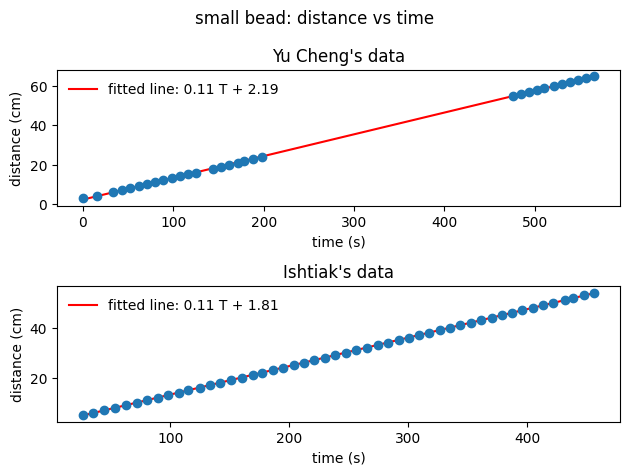

In [53]:
fig, (ax1, ax_ish) = plt.subplots(2,1)

fig.suptitle('small bead: distance vs time')

ax1.set_title("Yu Cheng's data")
ax1.errorbar(time, distance, xerr = error_x, fmt='o')

line = stats.linregress(time, distance)

ax1.plot(time, line.intercept + line.slope*time, 'r', label=r'fitted line: {:1.2f} T + {:1.2f}'.format(float(line.slope), float(line.intercept)))
ax1.legend(loc='upper left', frameon=False)
ax1.set_xlabel('time (s)')
ax1.set_ylabel('distance (cm)')


ax_ish.set_title("Ishtiak's data")
ax_ish.errorbar(ish_time, ish_distance, xerr = ish_xerr, yerr = ish_yerr, fmt='o')

line = stats.linregress(ish_time, ish_distance)

ax_ish.plot(ish_time, line.intercept + line.slope*ish_time, 'r', label=r'fitted line: {:1.2f} T + {:1.2f}'.format(float(line.slope), float(line.intercept)))
ax_ish.legend(loc='upper left', frameon=False)
ax_ish.set_xlabel('time (s)')
ax_ish.set_ylabel('distance (cm)')



fig.tight_layout()

## Pandas to Numpy: my_density

In [10]:
#create numpy array to receive panda
#(number of columns, number of rows)
array_shape = (len(density_df.columns), density_df.index.stop)
density_data = np.zeros(array_shape)

#pair column name with column number
col_iterator = zip(density_df.columns, range(0, len(density_df.columns), 1))

#retrieve column from pandas using name; assign to numpy using number
for col_name, col_num in col_iterator:
    density_data[col_num] = density_df[col_name].to_numpy()

## Data processing: density

In [11]:
my_volume = density_data[0][~np.isnan(density_data[0])]
my_mass = density_data[1][~np.isnan(density_data[0])]


#error is about 0.5cm^3 due to my mistakes in making measurements
my_xerr = np.full(my_volume.size, 0.5)
my_yerr = np.full(my_mass.size, 0.0005)

ish_volume = density_data[2]
ish_mass = density_data[3]

ish_xerr = np.full(ish_volume.size, 0.5)
ish_yerr = np.full(ish_mass.size, 0.0005)

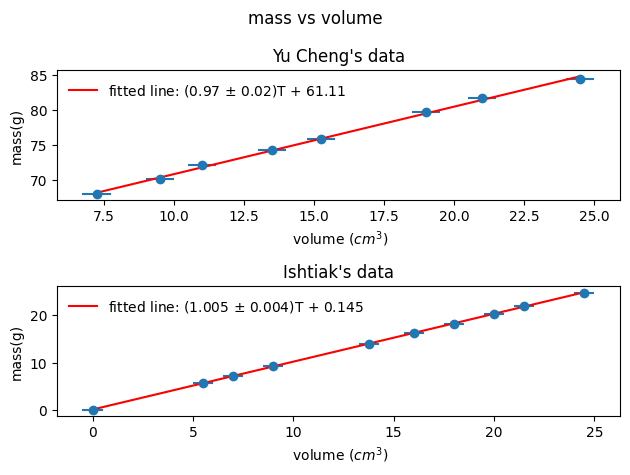

In [14]:
fig, (ax_yc, ax_ish) = plt.subplots(2,1)

fig.suptitle('mass vs volume')

ax_yc.set_title("Yu Cheng's data")
ax_yc.errorbar(my_volume, my_mass, xerr = my_xerr, yerr = my_yerr,fmt='o')

line = stats.linregress(my_volume, my_mass)

ax_yc.plot(my_volume, line.intercept + line.slope*my_volume, 'r', label=r'fitted line: ({:1.2f} $\pm$ {:1.2f})T + {:1.2f}'.format(float(line.slope), float(line.stderr), float(line.intercept)))
ax_yc.legend(loc='upper left', frameon=False)
ax_yc.set_xlabel(r' volume ($cm^3$)')
ax_yc.set_ylabel('mass(g)')

ax_ish.set_title("Ishtiak's data")
ax_ish.errorbar(ish_volume, ish_mass, xerr = ish_xerr, yerr = ish_yerr,fmt='o')

line = stats.linregress(ish_volume, ish_mass)

ax_ish.plot(ish_volume, line.intercept + line.slope*ish_volume, 'r',label=r'fitted line: ({:1.3f} $\pm$ {:1.3f})T + {:1.3f}'.format(float(line.slope), float(line.stderr), float(line.intercept)))
ax_ish.legend(loc='upper left', frameon=False)
ax_ish.set_xlabel(r' volume ($cm^3$)')
ax_ish.set_ylabel('mass(g)')


fig.tight_layout()

# Refereces

### Specificities used in this example
Fomatting floating point number  
https://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python

error bar example  
https://matplotlib.org/stable/gallery/statistics/errorbar.html#sphx-glr-gallery-statistics-errorbar-py

zip() example  
https://stackoverflow.com/questions/51747961/how-to-use-2-index-variable-in-a-single-for-loop-in-python

pandas: what you must do to import excel  
https://datatofish.com/read_excel/

using excel sheets  
https://saturncloud.io/blog/pandas-readexcel-with-multiple-sheets-and-specific-columns/

### Useful background

pandas quick start  
https://pandas.pydata.org/docs/user_guide/10min.html

CSV file using notepad example  
https://www.businessinsider.com/guides/tech/what-is-csv-file

effective matplotlib article  
https://pbpython.com/effective-matplotlib.html

numpy load file  
https://numpy.org/doc/stable/user/how-to-io.html


